**Не бесконечный список**

1. **Загрузка данных**
2. **EDA**
2.1. Анализ целевого признака
2.2. Анализ вещественных признаков
2.3. Анализ категориальных признаков
2.4. Корреляции
3. **Предобработка данных**
3.1. Обработка выбросов
3.2. Обработка пропусков
3.3. Построение новых признаков
.Отбор признаков
6. **Разбиение на train и test**
7. **Построение модели**
8. **Прогнозирование на тестовом датасете**

##### Импорты

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

##### Функция оптимизации использования памяти

In [16]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

##### Функция для расчета градиента, если я смогу дописать класс GradientBoostingRegressor

In [17]:
def gradient(y, y_pred):
    return -(y - y_pred)

##### Функция для расчета доли дисперсии зависимой переменной от независимых

In [18]:
def r2_score(y_pred, y):
    sst = np.sum((y - y.mean()) ** 2)
    ssr = np.sum((y_pred - y) ** 2)
    r2 = 1 - (ssr / sst)
    return r2

# EDA

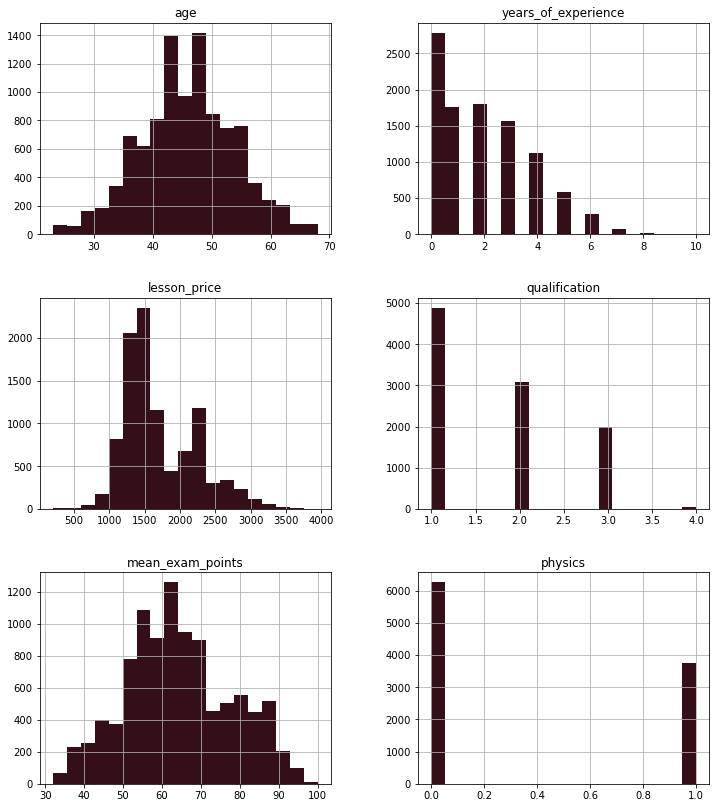

In [60]:
cols = ['age', 'years_of_experience', 'lesson_price', 'qualification', 'mean_exam_points', 'physics']
color = '#340f18'
data[cols].hist(figsize =(12,14), bins = 19, color=color)
plt.show()

### Анализ целевого признака

### Анализ категориальных признаков

### Корелляции

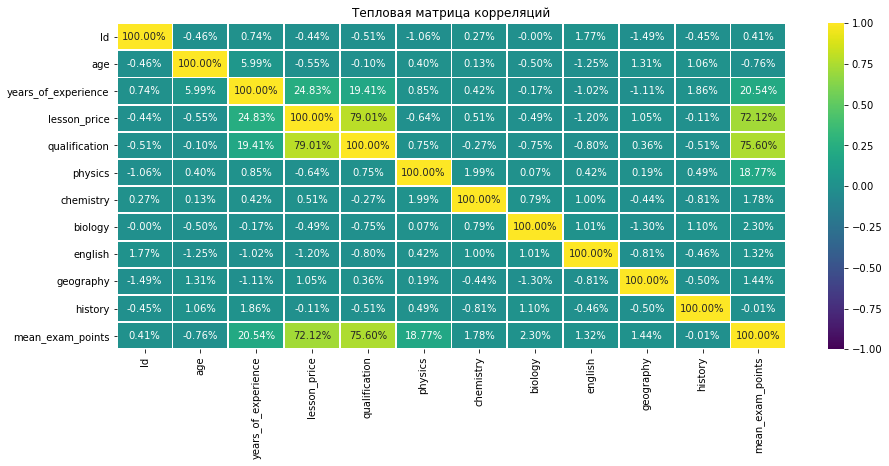

In [61]:
plt.rcParams['figure.figsize'] = (15.0, 6.0)
corr = data.corr()
sns.heatmap(corr, annot = True, fmt='.2%', vmin=-1, vmax=1, center= 0, linewidths = 1, cmap = 'viridis')
plt.title('Тепловая матрица корреляций')
plt.show()

In [100]:
data = pd.read_csv('tutors-expected-math-exam-results/train.csv')
test_data = pd.read_csv('tutors-expected-math-exam-results/test.csv')

# Предподготовка данных

In [101]:
# удаление колонки Id
data = data.drop(['Id'], axis=1)
test_data = test_data.drop(['Id'], axis=1)

In [102]:
# удаление бесполезных признаков, простой отбор
categ_features = ['english', 'geography', 'history']
data.drop(categ_features,axis=1,inplace=True)

In [103]:
# оптимизация использования памяти
reduce_mem_usage(data)

Memory usage of dataframe is 0.61 MB
Memory usage after optimization is: 0.31 MB
Decreased by 50.0%


,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,mean_exam_points
0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,63.0
1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,86.0
2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,53.0
3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,56.0
4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,59.0
...,...,...,...,...,...,...,...,...
9995,44.0,0.0,1700.0,2.0,1.0,1.0,0.0,78.0
9996,51.0,0.0,1700.0,2.0,0.0,0.0,0.0,64.0
9997,34.0,1.0,1250.0,1.0,1.0,0.0,0.0,58.0
9998,33.0,3.0,1100.0,1.0,0.0,0.0,0.0,51.0


In [104]:
# инициализация X и y
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)

# Разбиение данных

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=41)

# Построение модели

In [1]:
########################################################################    
#                                                                      #
#                         DECISION TREE REGRESSOR                      #
#                                                                      #
########################################################################

class Node():
    
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red

        # for leaf node
        self.value = value


class DecisionTreeRegressor:
    
    def __init__(self, min_samples_split=2, max_depth=2, min_gain=0.1):
        # initialize the root of the tree
        self.root = None

        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.min_gain = min_gain

    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''

        X, y = dataset[:, :-1], dataset[:, -1]
        num_samples, num_features = np.shape(X)
        best_split = {}
        # split until stopping conditions are met
        if num_samples >= self.min_samples_split and curr_depth <= self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["var_red"] > 0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth + 1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth + 1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree, best_split["var_red"])

        # compute leaf node
        leaf_value = self.calculate_leaf_value(y)
        # return leaf node
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''

        # dictionary to store the best split
        best_split = {}
        max_var_red = -float("inf")
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    
                    if curr_var_red < self.min_gain:
                        continue
                    # update the best split if needed
                    if curr_var_red > max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red

        # return best split
        return best_split

    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''

        dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])

        dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])

        return dataset_left, dataset_right

    def variance_reduction(self, parent, l_child, r_child):
        ''' function to compute variance reduction '''

        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        return reduction

    def calculate_leaf_value(self, y):
        ''' function to compute leaf node '''

        val = np.mean(y)
        return val

    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''

        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_" + str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)

    def fit(self, X, y):
        ''' function to train the tree '''

        dataset = np.concatenate((X, y), axis=1)
        self.root = self.build_tree(dataset)

    def make_prediction(self, x, tree):
        ''' function to predict new dataset '''

        if tree.value:
            return tree.value
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

    def predict(self, X):
        ''' function to predict a single data point '''

        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
########################################################################    
#                                                                      #
#                              BAGGING                                 #
#                                                                      #
########################################################################
def __get_datasets(self,X, y):
    '''Randomly sample the preset number of training instances.'''
    n_samples = int(self.max_samples * X.shape[0])
    mx = X.shape[0]
    sample_idx = np.random.choice(mx, n_samples, replace=self.bootstrap)
    oob_idx = [i for i in range(mx) if i not in sample_idx]

    return X[sample_idx], X[oob_idx], y[sample_idx], y[oob_idx]

def fit(self, X, y):
    '''Fit each of the base estimators in the ensemble to the training set.'''
    if X.ndim == 1:
        X = X.reshape(-1,1)

    self.oob_score = 0
    self.features = []
    self.oob_valid = True

    # Get the parameters to be passed to the estimator's constructor.
    param_dict = self.__get_estimator_params()

    for i in range(self.n_estimators):
        # Get subset of features to be used.
        features = self.__get_features(X)

        # Get the subset of training instances to be used, as well as the 
        # out-of-bag instances.
        X_data, X_oob, y_data, y_oob = self.__get_datasets(X[:, features], y)

        # Create an estimator object.
        estimator = self.base_estimator.__class__(**param_dict)
        estimator.fit(X_data,y_data)

        # If the dataset used to train the estimator has associated oob
        # instances, calculate the estimators oob score, else set the
        # oob score to be invalid.
        if len(y_oob) > 0 and self.oob_valid:
            score = np.array([estimator.predict(x) for x in X_oob])

            score = (score == y_oob).sum()

            self.oob_score += score / float(len(y_oob))
        else:
            self.oob_valid = False

        self.features.append(features)
        self.estimators.append(estimator)

    if self.oob_valid:
        self.oob_score /= float(self.n_estimators)

# Прогнозирование 

## Проверка на train

In [107]:
regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=5, min_gain=0.1)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [108]:
# оценка
r2_score(y_pred, y_test.T[0])

0.7773400247097015

## Прогнозирование на test

In [90]:
y_test_pred = regressor.predict(np.array(test_data))

d = {'Id': np.arange(0 + 10000, 20000), 'mean_exam_points': np.array(y_test_pred)}
y_test_pred = pd.DataFrame(data=d)

# запись прогноза в файл
y_test_pred.to_csv('./submission.csv',index=False)